# Integrals

In many cases, we need to compute either integrals of functions that cannot be integrated symbolically (or the integral expressions we obtain with symbolic methods are terrifying). In those cases, we usually resort to numerical methods. 

The simplest methods to evaluate definite integrals over an interval $[a,b]$ is the trapezoidal rule,
$$
   \int_a^b f(x) dx = \frac{\Delta}{2} \left(f(x_0) + 2 f(x_1) + \ldots + 2 f(x_{n-1} + f(x_n))\right)
$$
and its higher order derivatives (romberg, simpson). All these methods rely on subdivisions of the integration interval in equally spaced segments. They are particularly well suite for computing integrals of sampled functions.

Gauss quadrature rules approximate the integral as weighted sums of the function value, taken at specific points (mot equally spaced) of the integration interval:
$$
\int_{-1}^{+1} f(x) dx \approx \sum_i w_i f(x_i)
$$
it is possible to show that there exists specic points (corresponding to the zeros of the Legendre polynomial of degree n) and specific weights that make the integral exact for all polynomials of degree $p \le 2n-1$. Gauss (aka Gauss-legendre quadrature rules are easy to use, stable and fast).

In [5]:
# let's start with our usual mantras
import numpy as np
import pylab as pl
pl.ion()

## Integrating sampled functions

Very often, we are dealing with reasonnably smooth functions which are sampled on a grid. In that case, the trapezoidal rule is generally all we need. Let's look at the example below. 

In [7]:
from scipy.integrate import trapz

xx = np.linspace(0., 1., 100)
y = xx*xx*xx
I = trapz(y, x=xx)

print "I: %f  (exact: %f)" % (I, 1/4.) 

I: 0.250026  (exact: 0.250000)


Not too bad, and generally sufficient for practical applications -- if unsure, we may use higher order variants such as the Simpsons (aka Kepler) rule.

There is a useful variant of trapz, which computes the cumulative integrals. This is useful if we are dealing with functions defined as an integral: $g(x) = \int_0^x f(t) dt$. In that case, we can proceed as follows. 

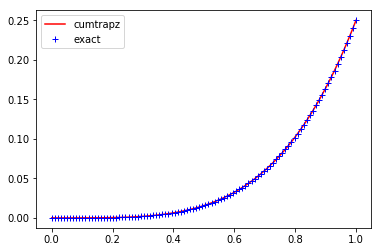

In [12]:
from scipy.integrate import cumtrapz

xx = np.linspace(0., 1., 100)
y = xx*xx*xx
z = cumtrapz(y, x=xx, initial=0)

pl.plot(xx, z, 'r-', label='cumtrapz')
pl.plot(xx, xx**4/4., 'b+', label='exact')
pl.legend()

<a id="integrals"></a>
## Integrating (non sampled) functions

`scipy.integrate` has an efficient set of routines to compute definite integrals. They generally rely on variants of the gauss quadrature. 

10.6348337074 1.50547390214e-10


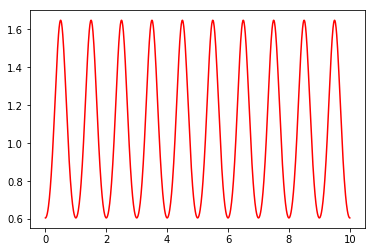

In [16]:
import scipy.integrate as integrate

def f(x):
    return np.exp(-0.5 * np.cos(2 * np.pi * x))

xx = np.linspace(0., 10., 1000)
pl.plot(xx, f(xx), 'r-')

v, err = integrate.quad(f, 0., 10.)
print v, err

## Example

We have seen in class that the age of the Universe is given by 
$$
t = \frac{1}{H_0} \int_0^{a/a_0} \frac{da}{\left[\Omega_m/x + \Omega_r / x^2 + \Omega_\Lambda x^2 + (1-\Omega_m - \Omega_r - \Omega_\Lambda)\right]^{1/2}}
$$
where $a$ is the universe scale factor ($a_0 = 1$ today). $H_0$ is the Hubble constant, which has units of time (7.1589e-05 Mega-years or Myr), and the $\Omega_X$ parameters are the energy densities of the components of the Universe (matter, radiation etc...) in units of the critical density.


* Implement the integrand as a python function
* plot it (between $\approx 0$ and 1
* compute the age of the Universe for 
    * $(H_0=7.1589\ 10^{-5} Myr^{-1}, \Omega_m=0.3, \Omega_r=6\ 10^{-5}, \Omega_\Lambda=0.7)$
    * $(H_0=7.1589\ 10^{-5} Myr^{-1}, \Omega_m=1.0, \Omega_r=6\ 10^{-5}, \Omega_\Lambda=0.0)$
    * $(H_0=7.1589\ 10^{-5} Myr^{-1}, \Omega_m=0.3, \Omega_r=6\ 10^{-5}, \Omega_\Lambda=0.0)$

In [18]:
def dt_a(x, Omega_m=0.3, Omega_l=0.7, Omega_r=6.E-5, H0=0.10227 * 0.7 / 1000):
    r = H0 * np.sqrt(Omega_m/x + Omega_r/x**2 + Omega_l*x**2 + (1-Omega_m - Omega_r - Omega_l))
    return 1. / r

In [19]:
def get_age_trapz(x, Omega_m=0.3, Omega_l=0.7, Omega_r=6.E-5, H0=0.10227 * 0.7 / 1000.):
    a, b, N = 1.E-8, x, 1000
    xx = np.linspace(a,b,N)
    dt = dt_a(xx, Omega_m=Omega_m, Omega_r=Omega_r, Omega_l=Omega_l, H0=H0)
    return trapz(dt, x=xx)